**Необходимо построить минимум 5 визуализации различных видов по выбранным данным, используя хотя бы две из рассмотренных на занятии библиотек**.

Для каждой визуализации описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и *какие гипотезы на ее основе можно выдвинуть*.

In [1]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

In [2]:
df = pd.read_csv("Morphometry.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Period(day)                   20 non-null     int64  
 1   Smooth muscle/collagen ratio  20 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 448.0 bytes


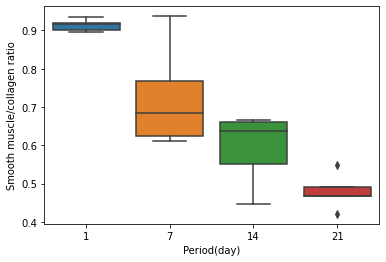

In [3]:
top_day = df['Period(day)'].value_counts().sort_values(ascending = False).head(4).index.values
top_day
ax = sns.boxplot(x="Period(day)", y="Smooth muscle/collagen ratio", 
            data=df[df['Period(day)'].isin(top_day)])


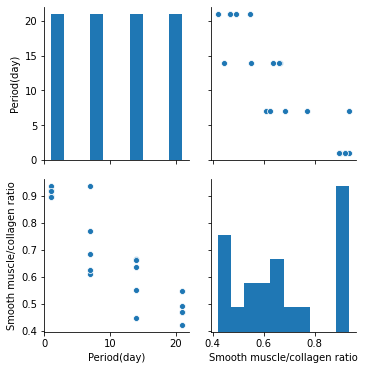

In [4]:
sns_plot = sns.pairplot(
    df[['Period(day)' , 'Smooth muscle/collagen ratio' ]])
sns_plot

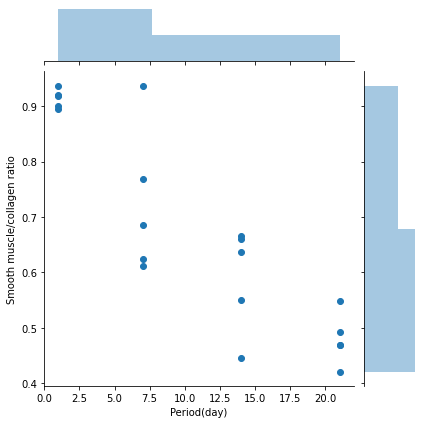

In [5]:
sns.jointplot(x='Period(day)', y='Smooth muscle/collagen ratio', 
              data=df, kind='scatter')

In [6]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [7]:
df['Period(day)'].unique()

array([ 1,  7, 14, 21], dtype=int64)

In [8]:
df.rename(columns={'Smooth muscle/collagen ratio': 'SM_CR'}, inplace=True)

In [9]:
data = []

for day in df['Period(day)'].unique():
    data.append(
        go.Box(y=df[df['Period(day)'] == day].SM_CR, 
               name= str(day))
    )
iplot(data, show_link = False)

In [11]:
testosterone = pd.read_csv("Testosterone.csv")
testosterone.head()

Rabbit     1     7    14    21
0       1  8.83  0.15  0.15  0.15
1       2  9.13  0.15  0.20  0.15
2       3  7.14  1.25  0.30  0.20
3       4  8.64  0.20  0.25  0.20
4       5  8.96  0.23  0.15  0.15

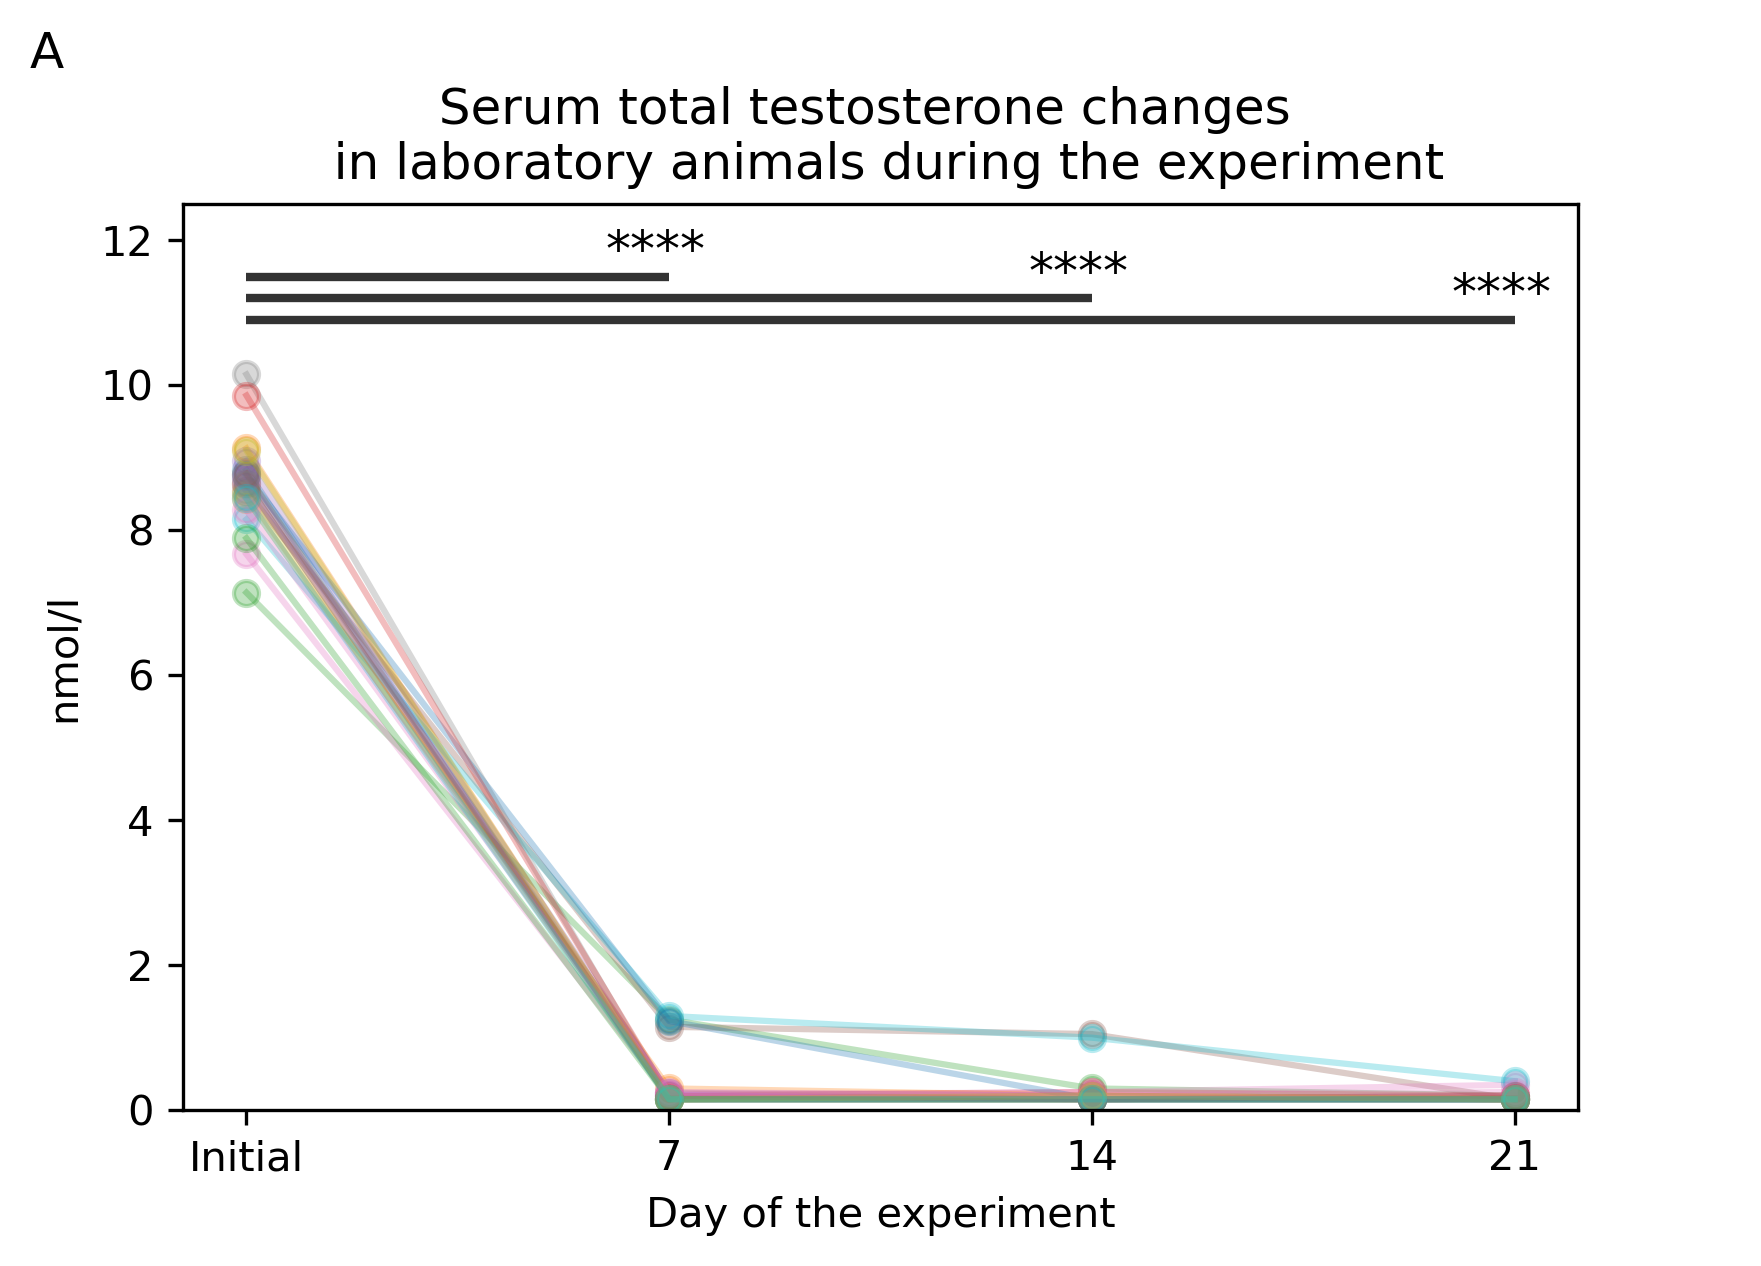

In [28]:
x = [0, 1, 2, 3]
foo = plt.figure(figsize=(6, 4), dpi=300)

for _ , row in testosterone[testosterone.columns[1:]].iterrows():
    plt.plot( x , row, '-o', alpha=.3)
    
plt.xticks(range(4), ['Initial', '7', '14', '21'])
plt.xlabel('Day of the experiment')
plt.ylabel('nmol/l')

plt.hlines(y=11.5, xmin=0, xmax=1, linewidth=2, colors='#333333')
plt.hlines(y=11.2, xmin=0, xmax=2, linewidth=2, colors='#333333')
plt.hlines(y=10.9, xmin=0, xmax=3, linewidth=2, colors='#333333')

plt.text(x=1-0.15, y=11.65, s='****', fontsize=12)
plt.text(x=2-0.15, y=11.35, s='****', fontsize=12)
plt.text(x=3-0.15, y=11.05, s='****', fontsize=12)

plt.ylim(0, 12.5)

plt.title('А                                                                                                         \n                         Serum total testosterone changes                           \n           in laboratory animals during the experiment          ')

plt.savefig('foo.svg')

In [15]:
Morphometry_ratio = pd.read_csv("Morphometry_ratio.csv")
Morphometry_ratio.head(20)

day   SMCT
0     1  0.900
1     1  0.895
2     1  0.920
3     1  0.936
4     1  0.918
5     7  0.611
6     7  0.937
7     7  0.625
8     7  0.769
9     7  0.685
10   14  0.637
11   14  0.446
12   14  0.666
13   14  0.660
14   14  0.551
15   21  0.548
16   21  0.468
17   21  0.469
18   21  0.492
19   21  0.421

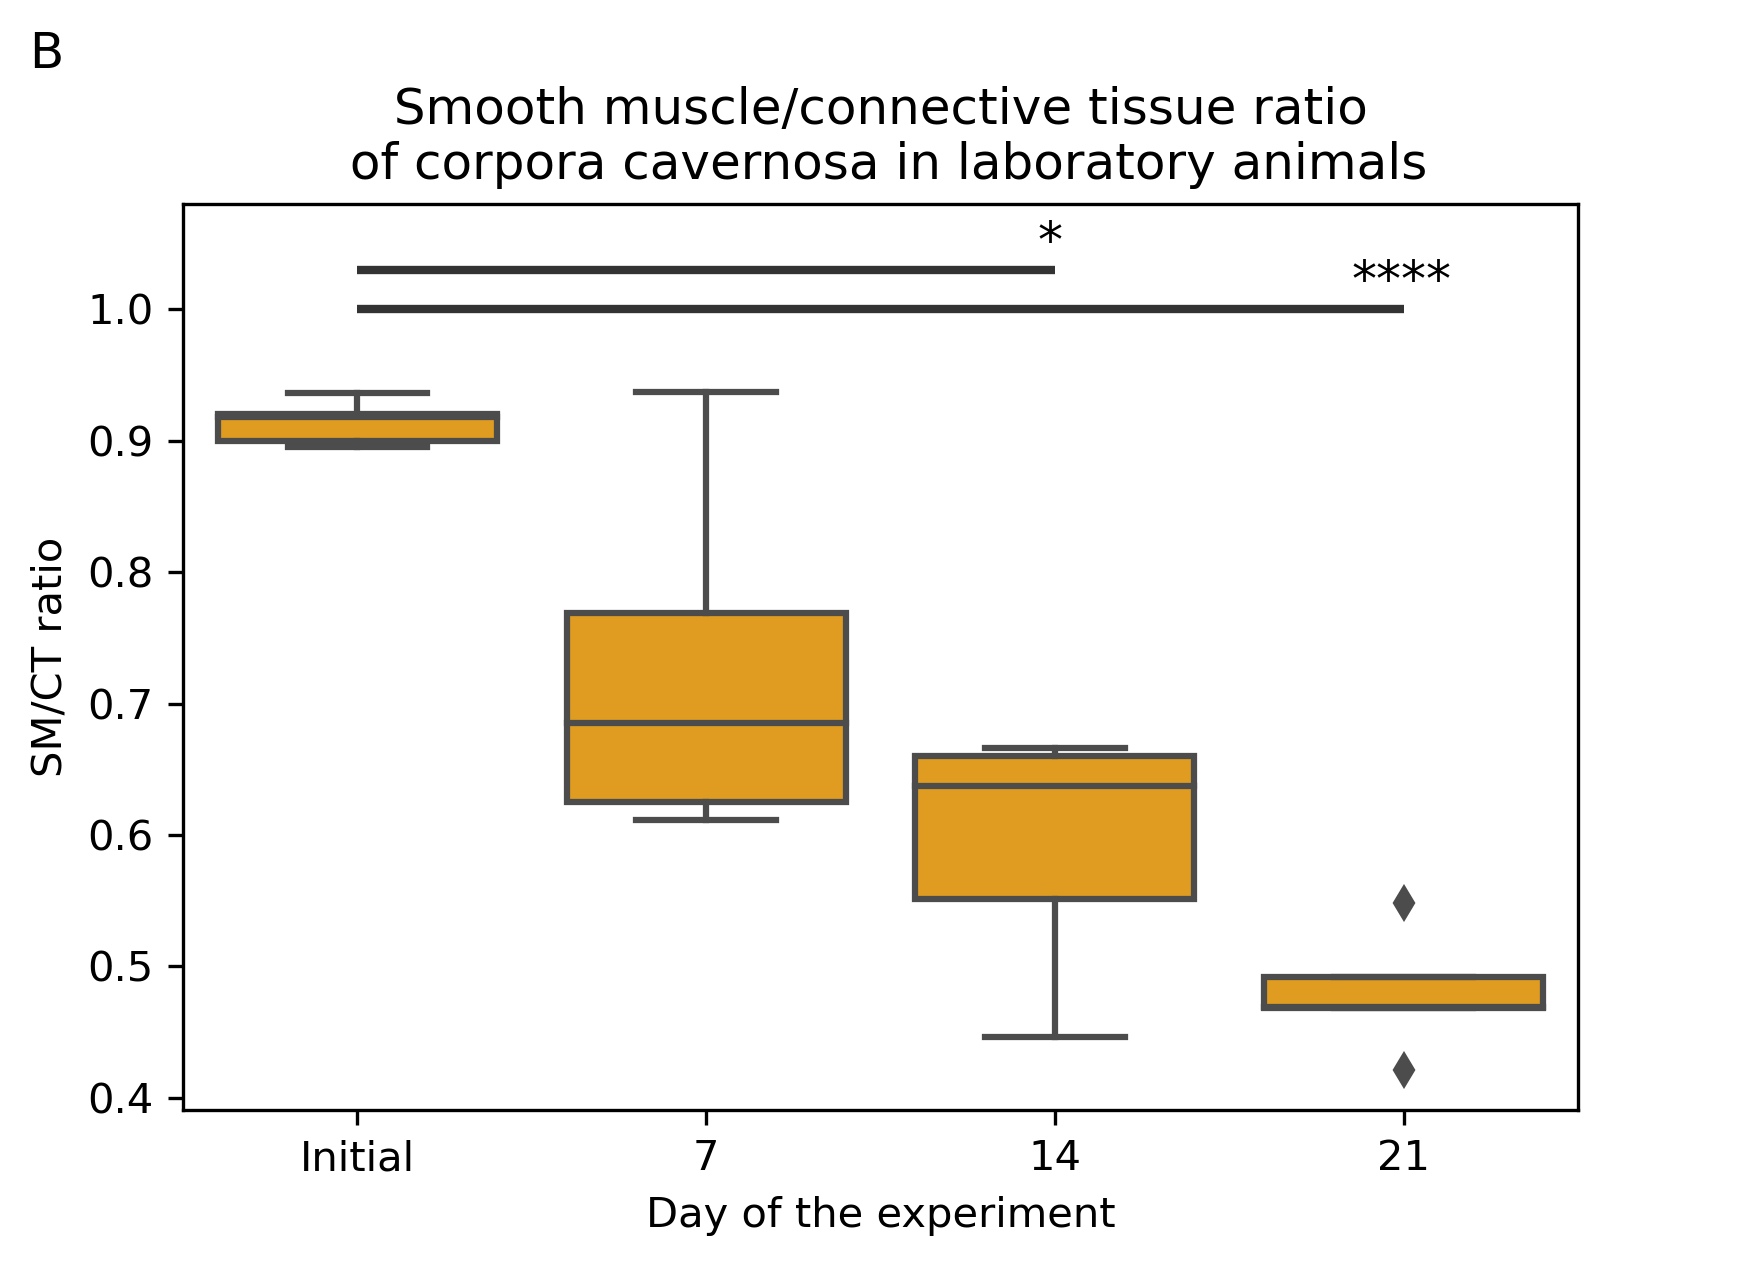

In [22]:
padi = {day: 'deepskyblue' for day in Morphometry_ratio['day'].unique()}

plt.figure(figsize=(6, 4), dpi=300)

sns.boxplot(x='day', y='SMCT', data=Morphometry_ratio, color = 'orange')       

plt.xticks(range(4), ['Initial', '7', '14', '21'])

plt.xlabel('Day of the experiment')
plt.ylabel('SM/CT ratio')

plt.hlines(y=1.03, xmin=0, xmax=2, linewidth=2, colors='#333333')
plt.hlines(y=1, xmin=0, xmax=3, linewidth=2, colors='#333333')

plt.text(x=2-0.05, y=1.04, s='*', fontsize=12)
plt.text(x=3-0.15, y=1.01, s='****', fontsize=12)

plt.ylim(top=1.08)

plt.title('B                                                                                                         \n Smooth muscle/connective tissue ratio \n of corpora cavernosa in laboratory animals')

plt.savefig('padi.svg')

In [21]:
Density = pd.read_csv("Density.csv")
Density.head(20)

day  Mean_Gray_Value
0     1             1426
1     1             1709
2     1             1837
3     1             1673
4     1             1598
5     7             1222
6     7             1332
7     7             1231
8     7             1316
9     7             1263
10   14             1263
11   14             1315
12   14             1255
13   14             1245
14   14             1187
15   21             1249
16   21             1216
17   21             1079
18   21             1098
19   21             1184

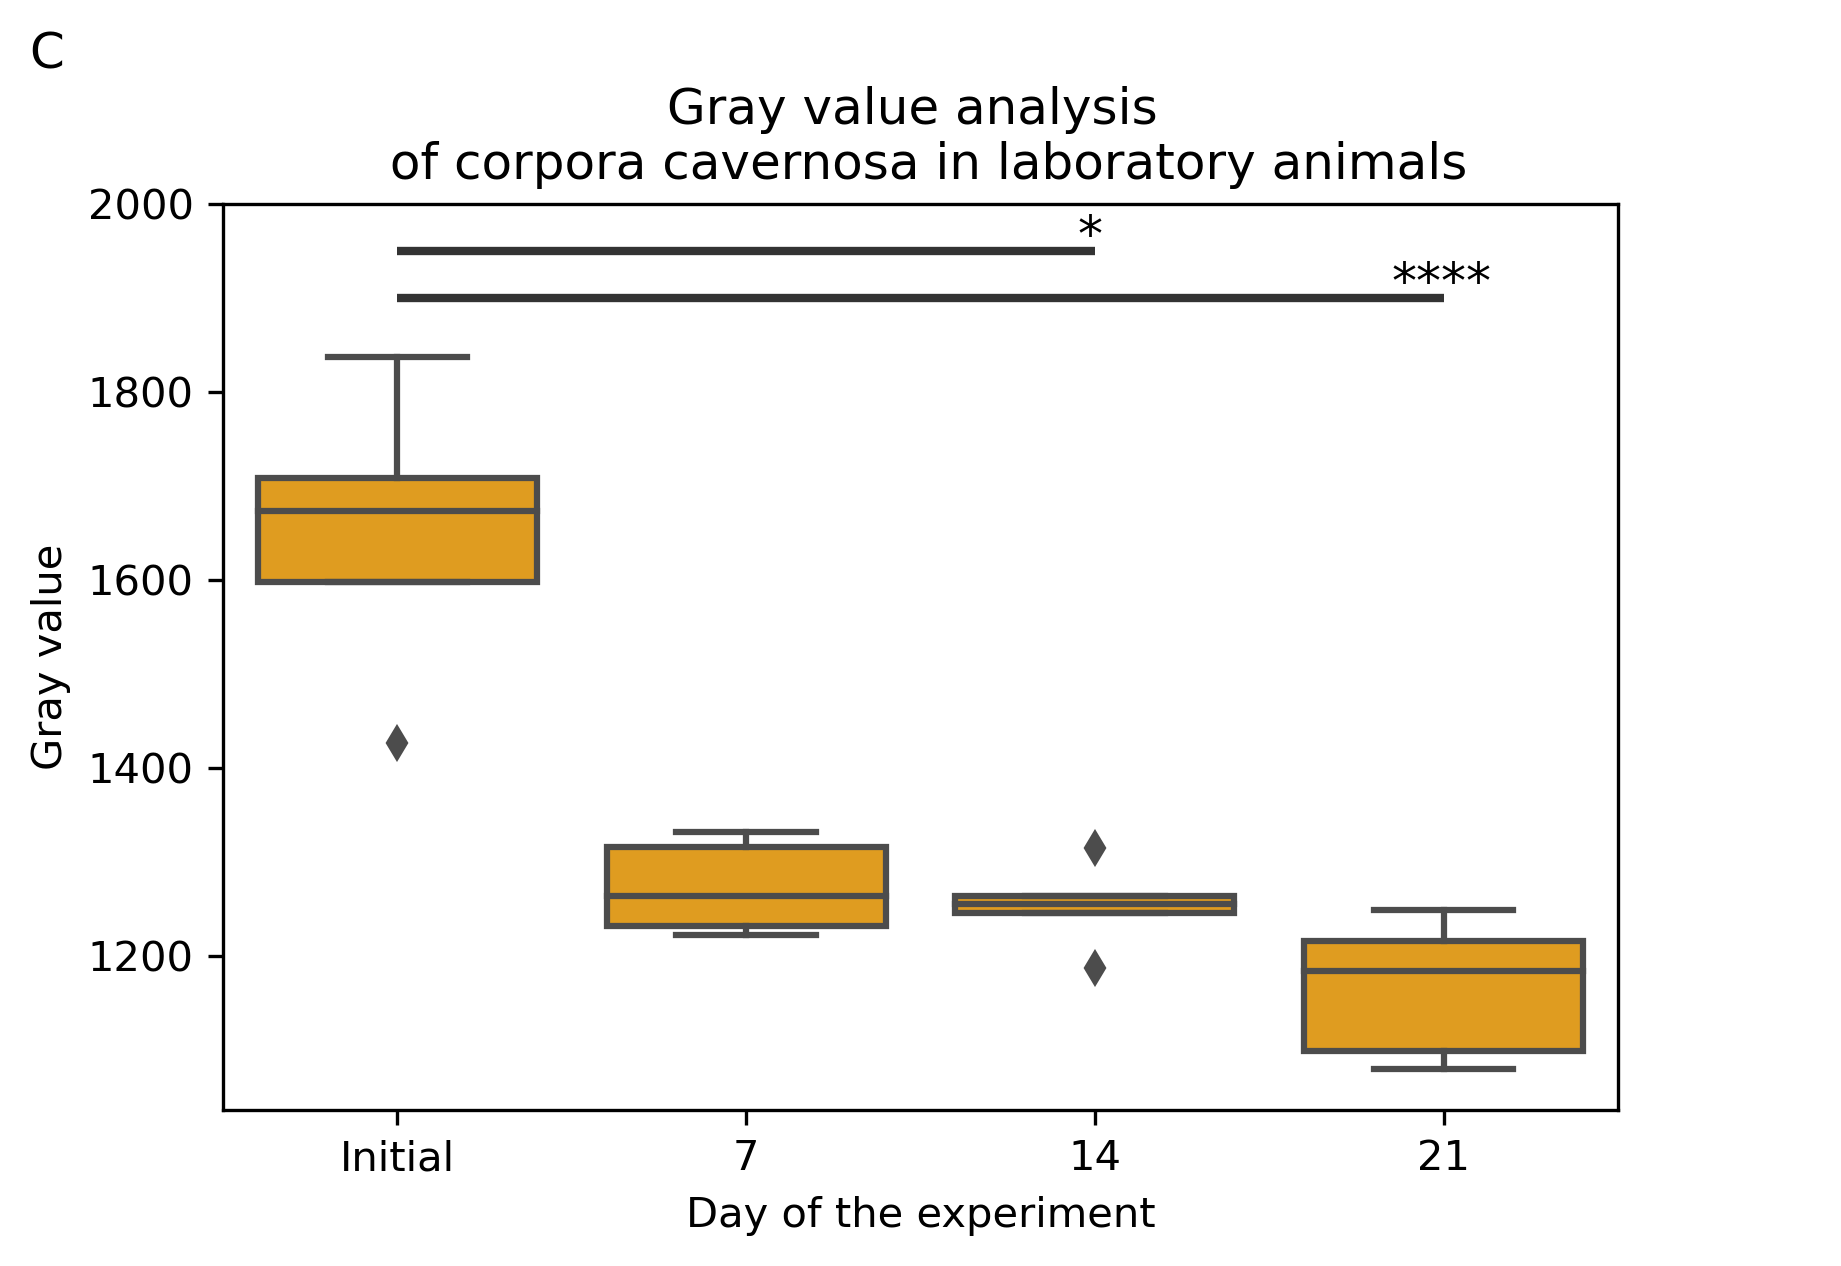

In [18]:
pal = {day: 'deepskyblue' for day in Density['day'].unique()}

plt.figure(figsize=(6, 4), dpi=300)

sns.boxplot(x='day', y='Mean_Gray_Value', data=Density, color = 'orange')       

plt.xticks(range(4), ['Initial', '7', '14', '21'])

plt.xlabel('Day of the experiment')
plt.ylabel('Gray value')

plt.hlines(y=1950, xmin=0, xmax=2, linewidth=2, colors='#333333')
plt.hlines(y=1900, xmin=0, xmax=3, linewidth=2, colors='#333333')

plt.text(x=2-0.05, y=1950, s='*', fontsize=12)
plt.text(x=3-0.15, y=1900, s='****', fontsize=12)

plt.ylim(top=2000)

plt.title('С                                                                                                              \nGray value analysis \n of corpora cavernosa in laboratory animals')

plt.savefig('pal.svg')

In [43]:
cor = Morphometry_ratio.join(Density, on= 'day' , how = 'inner')
cor['index1'] = cor.index
cor.head()
cor3 = cor[ ((cor['index1']==0) | ((cor['index1'] % 6 )==0))]
cor.head(200)

ValueError: columns overlap but no suffix specified: Index(['day'], dtype='object')

In [44]:
Correlation = pd.read_csv("Correlation.csv")
Correlation.head()

Ratio  Mean_Gray_Value
0  0.900             1426
1  0.895             1709
2  0.920             1837
3  0.936             1673
4  0.918             1598

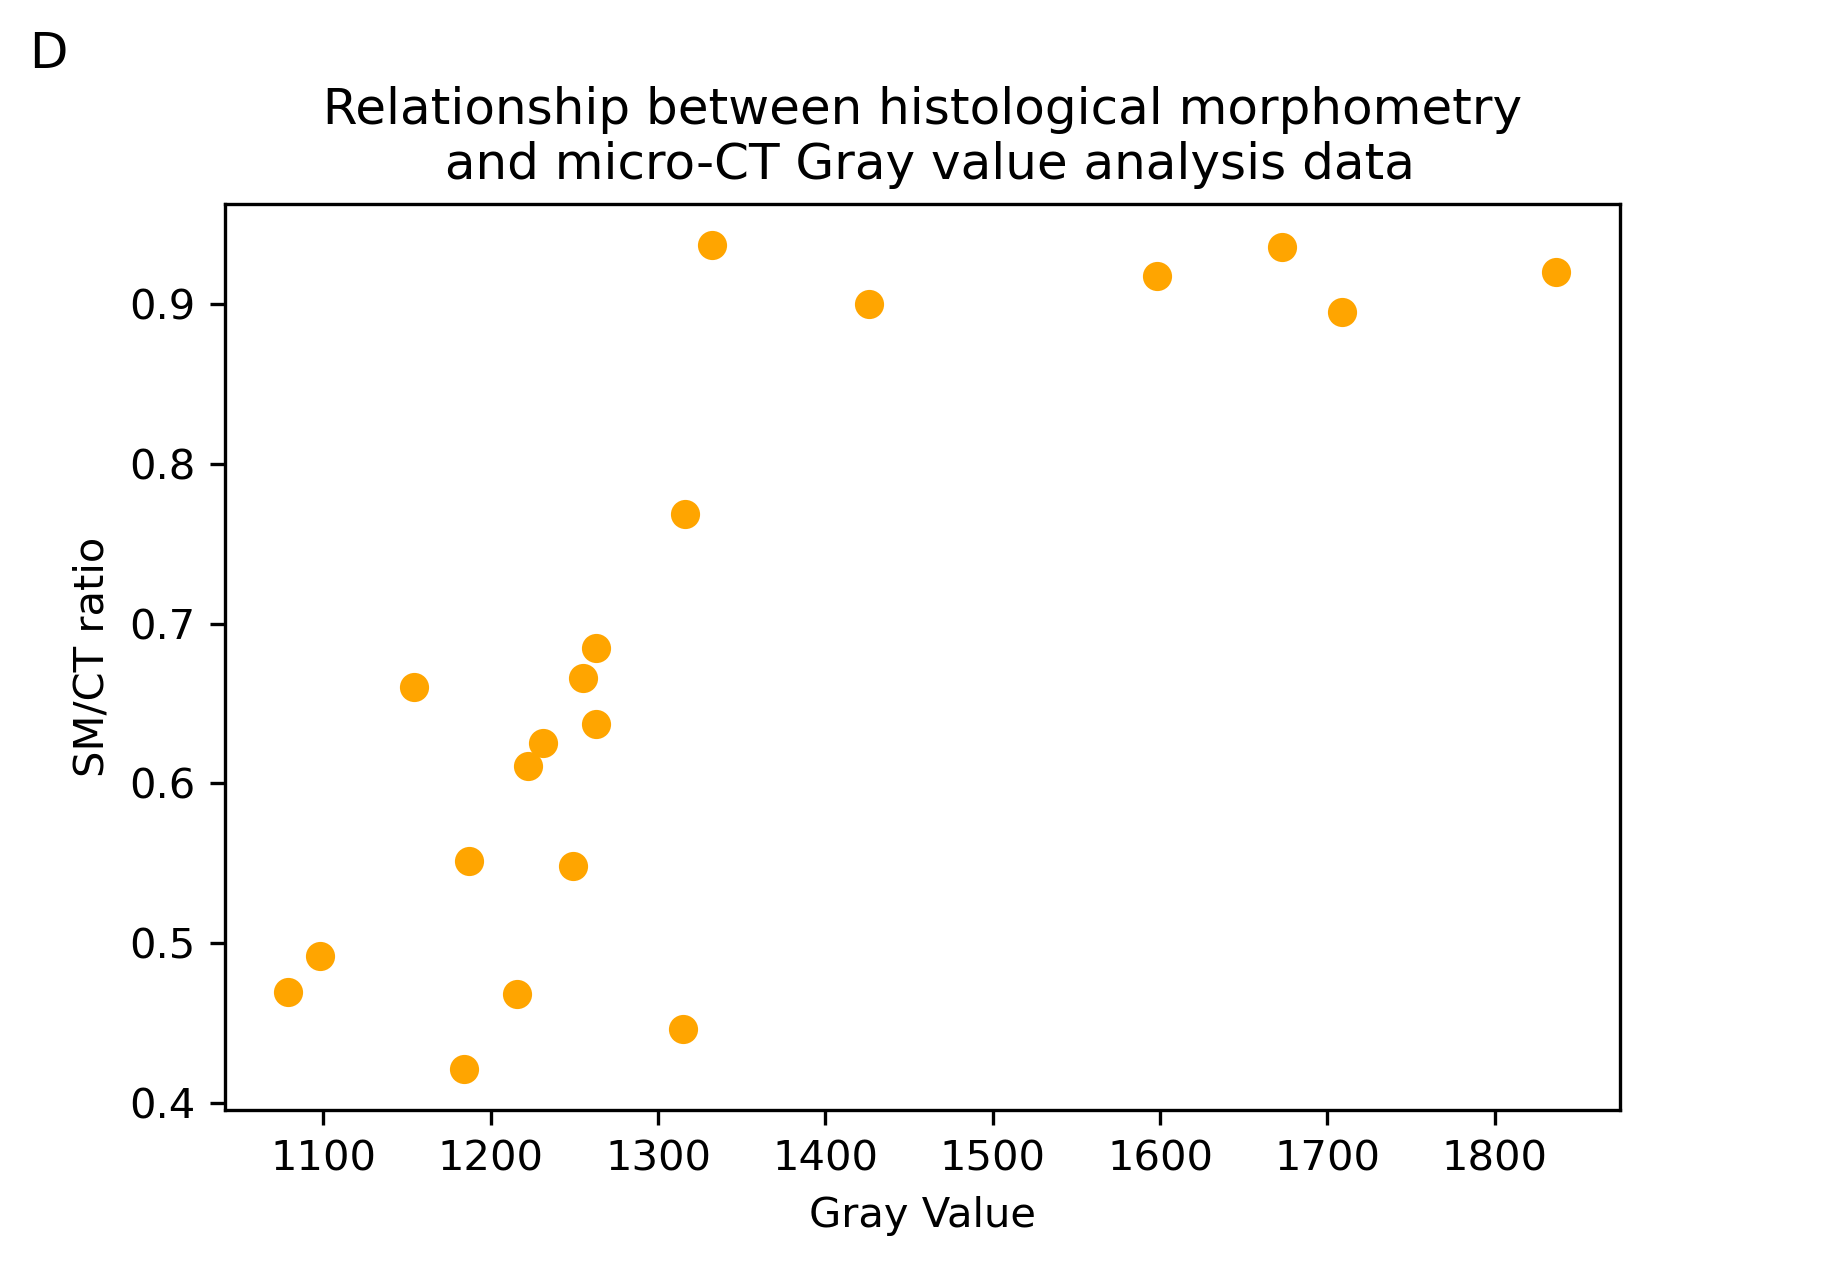

In [45]:
Correlation = pd.read_csv("Correlation.csv")
### Чтение файла ###


plt.figure(figsize=(6, 4), dpi=300)

###  не забываемпереиминовывать столбцы из датафрейма в коде ###
plt.scatter(x='Mean_Gray_Value', y='Ratio', data=Correlation, color='orange')

plt.xlabel('Gray Value')
plt.ylabel('SM/CT ratio')

plt.title('D                                                                                                              \n Relationship between histological morphometry \n and micro-CT Gray value analysis data')

plt.savefig('fo1.svg')

**Откуда брать данные?**

Можно взять свой датасет (тогда не забудьте его выложить на github вместе с ноутбуком) или воспользоваться любым понравившемся из открытых источников (например, [kaggle.com](https://www.kaggle.com/)). Если идей нет, можете взять один из перечисленных ниже:

* [Данные IMDB](https://www.kaggle.com/tmdb/tmdb-movie-metadata);
* [Данные NYC](https://www.kaggle.com/c/nyc-taxi-trip-duration);
* [Данные NBA](https://www.kaggle.com/drgilermo/nba-players-stats).

In [ ]:
# Import dataset 
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# Prepare Data 
# Create as many colors as there are unique midwest['category']
categories = np.unique(df['variety'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(3)]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
for i, category in enumerate(categories):
    plt.scatter('sepal length (cm)', 'sepal width (cm)', 
                data=df.loc[df.variety==category, :], 
                s=20, c=colors[i], label=str(category))

# Decorations
plt.gca().set( xlabel='sepal length (cm)', ylabel='sepal width (cm)')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Хотел посмотерть , ", fontsize=22)
plt.legend(fontsize=12)    
plt.show()